# Click-log Analysis and Visualization

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import re
import os
import sys
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_colwidth', -1)

## Importing the Data

In [3]:
# Reading the data to the DataFrame 'df'
df = pd.read_csv(r"C:\Users\Raveesh Kapoor\Desktop\Sample-click-log.csv", encoding = 'iso-8859-1')

In [4]:
# Viewing the first 5 records of the dataset
df.head()

,transaction_id,affiliate_id,offer_id,datetime,ip,user_agent,country_code,device_model,device_os,device_os_version,ios_ifa,google_aid
0,10227496c1e02a47413a940a54f71d,5087,32394,9/10/17 2:33,174.209.24.165,"Mozilla/5.0 (iPhone; CPU IPhone OS 10_3_3 Like Mac OS X) AppleWebKit/603.3.8 (KHTML, Like Gecko) Mobile/14G60",US,iPhone,iOS,10.3,NaN,NaN
1,102c9a956cc809df1e11c572f254bc,5087,32394,9/10/17 2:33,107.77.89.33,"Mozilla/5.0 (iPhone; CPU IPhone OS 10_2_1 Like Mac OS X) AppleWebKit/602.4.6 (KHTML, Like Gecko) Mobile/14D27",US,iPhone,iOS,10.2,NaN,NaN
2,1020255a5a856d72f0593359c7c56f,5087,32394,9/10/17 2:34,66.87.148.50,"Mozilla/5.0 (iPhone; CPU IPhone OS 10_3_3 Like Mac OS X) AppleWebKit/603.3.8 (KHTML, Like Gecko) Mobile/14G60",US,iPhone,iOS,10.3,NaN,NaN
3,102771c8d145a4168e2eac1215124b,5087,32394,9/10/17 2:34,172.58.224.168,"Mozilla/5.0 (iPhone; CPU IPhone OS 10_2_1 Like Mac OS X) AppleWebKit/602.4.6 (KHTML, Like Gecko) Mobile/14D27",US,iPhone,iOS,10.2,E2B52269-2D47-411B-B7F2-3655402CB07C,NaN
4,102a5e3bcdeecfed07154f605c5981,5087,32394,9/10/17 2:34,97.46.129.38,"Mozilla/5.0 (iPhone; CPU IPhone OS 10_2_1 Like Mac OS X) AppleWebKit/602.4.6 (KHTML, Like Gecko) Mobile/14D27",US,iPhone,iOS,10.2,NaN,NaN


## Describing the Data

In [5]:
df.shape  # Finding the dimensions of the dataset

(85976, 12)

In [6]:
df.info() # Information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85976 entries, 0 to 85975
Data columns (total 12 columns):
transaction_id       85976 non-null object
affiliate_id         85976 non-null int64
offer_id             85976 non-null int64
datetime             85976 non-null object
ip                   85976 non-null object
user_agent           85976 non-null object
country_code         85976 non-null object
device_model         85944 non-null object
device_os            85951 non-null object
device_os_version    85950 non-null float64
ios_ifa              10238 non-null object
google_aid           47116 non-null object
dtypes: float64(1), int64(2), object(9)
memory usage: 7.9+ MB


In [7]:
df.affiliate_id.nunique() # Number of unique values for Affiliate_Id

10

In [8]:
df.ios_ifa.nunique() # Number of unique values for Ios_Ifa

7713

In [9]:
df.google_aid.nunique() # Number of unique values for Google_Aid

46626

In [10]:
type(df.google_aid[0]) # Type of the variable Google_Aid

float

In [11]:
type(df.ios_ifa[0]) # Type of the variable Ios_Ifa

float

In [12]:
df['ios_ifa'] = df['ios_ifa'].astype(str) # Converting the data type to str

In [13]:
df['google_aid'] = df['google_aid'].astype(str) # Converting the data type to str

### 1(a): For every affiliate_id(Col B), calculate the unique ios_ifa(Col K) & google_aid(Col L) present in the data. 

In [14]:
# Calculating the unique values of ios_ifa with respect to affiliate_id
Unique_Aff_iosIfa = df.groupby('affiliate_id')['ios_ifa'].unique()

In [15]:
# Converting the above series to a DataFrame
pd.DataFrame(Unique_Aff_iosIfa)

,ios_ifa
affiliate_id,
1914,[nan]
2882,"[nan, EBA79070-D015-44C5-B845-90FD9D261BFD, 98982E52-2FEF-402E-9E48-40C435728E37, [idfa], D2316D28-01BD-47A1-B27A-6B210E7B555D, F23626B7-DB80-44F6-ACFC-EEBBB63F81A4, 249E1CC2-5310-41D8-ABF2-D2653751C21E, undefined, F5AE3ABE-FBF1-4F7F-9FE4-8FB6574F6AD2, B85EFA8D-F6DE-4332-9381-6F5FE4A8758E, 0E6B8DE3-12DA-4E7F-8975-0B93DD7ACA43, 0464E76B-4B7E-4A42-A1D6-9BA740CE2DFC, 215D4A11-C187-4BBB-B2F6-C643217B75C1, FF5016F6-1CE1-4045-AA40-C183A5A7E9D6, 10864AFF-8B9F-4188-B039-02B4B5EAEC47, E91B6FAF-3EA8-4B25-8B35-26B59D8BFA12, DBA6A3AE-1AA8-4907-B2B4-70625BB43C44, F7F507F7-8FCF-43D8-AEE3-C95C30801890, 00000000-0000-0000-0000-000000000000, B9B77A9F-5799-46FC-8631-D15032C09D44, 3EB18161-7662-4BE5-9368-53701ED84E67, 98D85586-18C0-4994-93DD-28B089D4CFE3, D6ED7818-8309-4C25-B5F2-FA63728FC3E2, 3B015625-940E-476F-A743-49E30266669F, 93EB9F6B-EECA-43AC-961B-3501E496B32A, 933A6EAB-FDF4-4AF1-B4BB-1705C5543751, 707423BD-AF9D-4694-A633-09C79C65B1A5, E7BF62AA-9B00-42D7-96C6-936D7FD52B70, 803F671C-9E34-4B63-B738-F0A5090119A0, CC32DC36-8C4E-4A06-BF48-AA3D7A55F329, 2FF40F61-E2D8-407C-8AF2-8C77495A03D9, 2fd4625c-1452-4bd4-92ed-3fdef9675eaa, 8F0C1643-1627-4F5E-9E16-190CD19555E9, 40402597-3111-4EC9-9485-90905C346702, A84D50E7-E3EA-4335-A1DC-4F87327C02B4, VOLUUM, 98C3104D-7F1D-476C-B878-8E4472B97876, 1A943368-554D-41B0-B893-48BF61D6C54A, ED6CC6BF-0249-439A-8D9A-BBEE51E6795F, 2FF93B84-28AF-4794-ADCA-567F8F4122D5, CA347C8F-0BB1-4E1E-8A94-825FB1A0351B, 3217E6F2-640A-4281-897E-90C9940FA5DD, 6885D566-8013-4ADC-9802-8F9D0F69CD7F, BEFA0334-5A25-4E34-8DC6-743D7FB6BCD5, E6DD195C-B1D5-4F88-BE0C-3271C76DD1A3, B7AF5553-DED5-4AB3-BC8B-817B24076B4F, A9EDAC4B-356A-4F5E-BE04-9697CB39E215, 781B288E-0C0C-4F09-805F-E3FA5DBCA13A, 2bafefe8-59e1-453f-b536-4996dc1310d7, E78E34A6-AF8A-47BE-A732-230FCAC0E6F2, 444E7965-D052-4041-AE91-E5A773D8D958, 8115742f-5d83-476b-8dcc-f4cc0deac4e3, 8EA45812-FA81-4805-A72A-DC6BFAF1D476, 521202EA-D287-4616-9500-E68DB38C0BF5, CEDAF483-EE9C-4A8C-97FE-EB8557EA1934, 1B95D89C-A523-49C6-ADEE-7392AD434352, 6DFC0B8D-EBBD-4C40-9CEC-A8C348A0818B, 998FF9F8-D08C-4A37-9758-2BFC436DE556, 94e49d1f-fd69-4193-9c4e-563a6d5e43e6, B0BF91BF-7EBC-4EAA-B2CA-BA077463419A, 034D528D-175B-4671-86F8-330793918FCB, 7E7DA59C-9580-4A45-83D5-1A161147F56E, 53C96012-3C97-49E2-BFE1-B2C401E51FDD, DF539CC1-18B1-4855-BF4D-26F0048E2E57, 9308E155-1F95-4233-940D-8B7C6D9895D8, 7C68B989-297C-4A44-B5D6-DD2A9479EFE9, 73EDC75B-AE48-4E41-BBDB-5B54FD3FF4C3, BA0102DC-4707-40D7-8E0D-8E9EF3459A73, 8FECCD52-5753-42C4-B518-E3DF43AC8FE8, AE646AF3-0020-427E-AEA3-AD614A6CAA08, EF8EBE2E-4DB1-4546-A451-F7AE30C92D7B, 1DCA093C-D739-43C0-B3F2-14C7E9B1829A, EB583863-DBD7-44A9-B36D-8963E69D9D05, 9B715C58-371D-4D46-BCBE-829FDCB5BE0A, 6D1F469D-02CE-4632-9572-92E6ABF2A050, 7B63CC48-7247-469B-AC05-1C578A527EE9>, 59F8E930-D5A7-4180-91B4-DB07B91CCF60, 93CB09F0-5A31-4226-8F40-7D44C538BC69, DDD6FC82-A172-4B84-966F-D2034D17A4E5, 16a1614d-6a25-4a46-ade8-0b0f376f4ce3, 86678A9A-519B-402F-A915-1270A23CA80C, 67518DD4-E97F-4BB7-86A5-59B21587E497, 617_b52462e8b8bbed5560bcfb25b21d, ae7b4dc0-b1f9-402e-a863-38b7849c25f5, 78ca54d4-6222-48ad-a85c-33b2ee5230ca, E482EF08-FBCF-4398-BCEA-53CAAED80390, C579797B-E993-4BD0-A7F2-FF97DFE18D45, D174FFB6-9FBA-4DC9-BD08-F044CC1CE620, C336A640-93A4-4AB2-8B7F-784F3F49BC11, A896A6B1-ED87-4F98-BCE4-02E231FBBF32, 8ba52805-9859-419a-86e4-12928b721dd3, FD497D46-8B3F-4BAE-9251-5D968E0ED662, 4BB51FDA-B02E-4383-9AAB-11012257B255, 70E7E2E8-1C07-4908-BE2D-36A5242DDD56, -!-ZjhmYjNhNDctYzI0Zi00ZGI0LTlmODItMGJiM2YzMGEwNzMxOzE1MDQ5Njg5NDY7dXM7aXBob25lO2J1Y2tzZW5zZTszMjB4NTA7NmM4OGM0NDUtMzYzYS00NmEwLTljMWR8, 57F95FA0-9BED-4FBA-8F17-C880467695CB, 3DA95E99-3C65-49A9-BB6F-365C3F174113, B34CA8AC-4497-441B-9EA5-F39C8E758733, 5FA9716A-1A08-4768-B488-41DD0A7BF7F1, 46C0A15F-FAA9-40E7-BD39-7A0801872A76, ...]"
4575,[nan]
5087,"[nan, E2B52269-2D47-411B-B7F2-3655402CB07C, CCF04F58-9FA2-4275-BF90-CB2A1B2DEAE2, {idfa}, DD5B7361-B0AD-486E-9B8C-D406499C76FE, 9b7ab2e8-fbda-4289-b8cf-2acde8f0

In [16]:
# Calculating the total unique values per affiliate_id
iosIfaUniqueCount = {}
for key in Unique_Aff_iosIfa.keys():
    iosIfaUniqueCount[key] = len(Unique_Aff_iosIfa.get(key))

In [17]:
iosIfaUniqueCount

{1914: 1,
 2882: 190,
 4575: 1,
 5087: 7535,
 5281: 8,
 6102: 1,
 6380: 1,
 6489: 3,
 6507: 1,
 6651: 1}

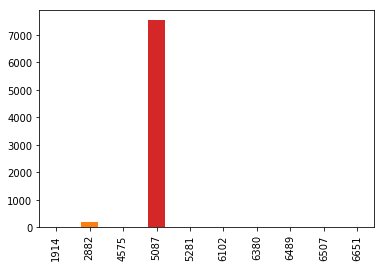

In [18]:
# Plotting the graph for ios_ifa with respect to affiliate_id
iosIfaPlot = pd.Series(iosIfaUniqueCount)
iosIfaPlot.plot('bar')

In [19]:
# Converting the above Dictionary to a DataFrame
plottingdf_iosIfa = pd.DataFrame(list(iosIfaUniqueCount.items()), columns=["ID","Ios_Ifa_Count"], index=iosIfaUniqueCount.keys())

In [20]:
plottingdf_iosIfa # DataFrame to be used for plotting the graph for 2(a)

,ID,Ios_Ifa_Count
1914,1914,1
2882,2882,190
4575,4575,1
5087,5087,7535
5281,5281,8
6102,6102,1
6380,6380,1
6489,6489,3
6507,6507,1
6651,6651,1


In [21]:
# Calculating the unique values of Google_Aid with respect to affiliate_id
Unique_Aff_googleAid = df.groupby('affiliate_id')['google_aid'].unique()

In [22]:
# Converting the above dictionary into a DataFrame
pd.DataFrame(Unique_Aff_googleAid)

,google_aid
affiliate_id,
1914,"[96a31720-931e-46a6-aad1-9f08e6ad27bd, fda7ddff-bfeb-4f15-9b1c-aaa9d4686652, 79d3faad-457e-451a-b907-8bbcc648b86a, 99f9fd76-3220-4529-952a-9fed45bee011, 7c484eed-7ff0-4128-b9c7-615dec263f6f, d187c171-1d18-461c-b13e-10d11403d6df, d8ac382f-4fd7-46c5-9426-4430053f6c94, 02a5dcc7-52c0-4c35-8d88-1f308b7dff4e, 6593db45-58a4-4d44-b516-0949835e6b6a, 033fbe3f-99bd-45bb-8502-a68388c28fba, 86182392-a4f3-44e6-92d2-e74eaa6883e5, b4023a7a-c323-475f-94c7-a5771fa5590a, b1b6bfcc-c4fc-43d1-bfd0-01fb95ea7d42, 35481f0d-a69d-4111-a837-ea5fb37a240a, 90edeb30-9a40-4513-a0b2-80ce754b3afb, 719e8600-cd09-4068-8398-a880acdb7ad0, d4191f97-f18e-4bbd-895d-108f325e217c, 81f81575-d0cd-4720-8913-263324d966a6, 57402944-543d-4886-99b2-a2473c987cf7]"
2882,"[nan, D2316D28-01BD-47A1-B27A-6B210E7B555D, Musi - Unlimited Free Music From YouTube (FREE App Download), {tp_aaid}, 1855862F-5D74-4D46-A06C-1493729CF85E, 00000000-0000-0000-0000-000000000000, og7p60oe-bvi8-7t4k-0egy-h9fiflp99me5, 40402597-3111-4EC9-9485-90905C346702, E78E34A6-AF8A-47BE-A732-230FCAC0E6F2, 5ba4ed58-af53-4d55-a105-d1a9437f6b6a, aff_sub3, [idfa], CONVX-0109, $IDFA, 6bca2959-70b3-4db2-bc70-945540d590c1, DB2F2F51-2DAA-4EA9-BDB2-690EF80BAEE0, CA6AF176-2A48-466D-BDD8-013EC54FB009, undefined, eqbax0uf-fmrb-wkgx-705m-9fy2bnigqhpy, A601739D-360F-4FE9-87B9-0050E9F1BBFE, C11A3D96-BBBB-4AA1-A761-F6EBE78DE4D8, 6BA835FF-BE4E-4638-8721-B4E555438F36, 27de7874-b852-4c6a-ad66-1da698171f78]"
4575,[nan]
5087,"[nan, b6066183a9cb4b8eb68ac6ea03ff8944, e7cc008b-2696-4018-ace9-c0d0bccf5ba3, MeetMe - Chat and Meet New People, {tp_aaid}, Musi - Unlimited Free Music From YouTube (FREE App Download), undefined, 705dc464-e6ed-48f9-a698-be1c8d6c9db9, 0qa9l8u6-gook-qp60-nzve-nf5ua3zj07cr, [gaid], Musi - Unlimited Music For YouTube, iVideo for Youtube, 205F3A23-03BF-4A9D-997A-4A30255311C0, mb9wtrfy-2a3w-d1mj-9jm5-qr0q0iw6tou4, 31BCAF32-0D19-442D-A924-26D3857ADCE9, efaa91bfb872480b8b7cadbc9a127e08, 88f8dc6b-2c47-4ce8-909a-dfb702a06359, 553476C0-287D-44F3-AAA5-BB28DE9AC962, B1DDBCF2F2635419710BD0D822D1D639, 665889B4-DE89-4A39-819C-67E694297C8E, $IDFA, DCFC7F66-3A27-4528-B445-20F4901EE0D5, dd7b76b6-81f0-4508-aca3-cae91a88a5b5, 1DAE8CB5-C874-40C3-B7EE-D050D72711CF, 54AC85DB-1D3F-4D37-8ABA-B95AD0AD0C6D, NetTube for Youtube, 42fllqmj-3k0y-0w2u-fxe9-t1nm6xa5nnhr, ECE208CA-3D40-4637-B4C4-519C2681389D, 1f73f7392ae7423c9dd13c1271be8c01, 8mpr5og6-6b36-pk4g-m1ve-enkghsfpl7k1, znrf76j5-gk4u-xo85-03gi-4nxj3nci42tx, 1qf2udnl-pmxd-rc7d-4mu1-v0dxtqbm8kb8, 7CD90512-9C16-4600-BD50-4AC2D149DC99, 318D1A7A-F1B8-45B9-8FF7-3B569050CC5C, aff_sub3, 317ead63-84db-48ac-af49-1fbe6400112d, zja5e80u-j9jt-fr5j-8xpv-3qthbymbcl1p, zl56nitm-ow3y-3i9m-via7-cyrvexmu9b9s, ea18e27c-4318-4307-8bd0-7bcdc1f02604, 1ec8dc70-e90e-4df0-87aa-a54deb345e97, cabee550-f36f-45b5-b69e-13925c542537, {gaid}, 8CBBA558-C4EC-4829-A90F-83B3ABA56888, idfa, 075a8402-5255-4e5d-b55f-83d41318a194, 423FF212-C0F0-42DE-A5DF-0E53AF6577D7, 26f29dcf-0582-4336-9d98-4513585ee24d, 00000000-0000-0000-0000-000000000000, 3ae2f909-8139-45fb-8f13-a291015a9f7e, 1FA08B03-D015-4280-872C-3702350E48D1, 7B443C79-87DC-489F-8F82-15F751CA0553, aad57f2e-1ba8-4e60-a7fe-badbc790edfc, [idfa], agltb3B1Yi1pbmNyDAsSA0FwcBixpIYUDA, f870ea31-a2da-4a2c-91a9-16691805b70f, hk41qyp2-aq9b-gq5u-e931-p7353eddxfvf, b9bf2c18-3527-42cf-b641-f587952502c8, v10coegp-uccy-kpbb-delq-ngrzhvk0pb22, 9408F3D5-1169-4754-8C4C-51E99CE88017, 7fw35dt4-s9ef-oi51-1z7v-boo0e17xw2c3, 64bb35f7-a9fa-4f22-a9c4-665abc2ee2de, 4827c014-d259-42eb-8fc2-2fe04c996f3d, 79e7d792-c4c3-4fb6-86b7-a32fc24b1af8, es9liker-2va2-cem2-h5qx-k12lgjw1fd3j, D03BCC94-09F4-42B4-A1C8-42ED82C1A784, DA7D054C-9EB8-414D-8412-90E18D5782BC, 85eec426-5ea2-4d2a-95fe-9cacb91b7240, 46B89D38-F66C-417B-B1D6-F0A3004163F0, dd9cd2c3-5eb0-41d6-95a4-6028c1eb4504, 2h53mhxf-0jz4-jjkh-fdnq-a0ppvpsj1ula, 951A3CDE-993F-45B9-9E81-BD71D82265FA, 1855862F-5D74-4D46-A06C-1493729CF85E, 9C7DBD63-4A96-4D36-8724-DA0875321C52, adc2e7bc-fb68-467b-b2ac-eb8a4b595c58, kk2ssc4p-hj4

In [23]:
# Calculate the total unique values per affiliate_id
googleAidUniqueCount = {}
for key in Unique_Aff_googleAid.keys():
    googleAidUniqueCount[key] = len(Unique_Aff_googleAid.get(key))

In [24]:
googleAidUniqueCount

{1914: 19,
 2882: 23,
 4575: 1,
 5087: 208,
 5281: 18,
 6102: 46188,
 6380: 1,
 6489: 4,
 6507: 1,
 6651: 179}

In [25]:
googleAidPlot = pd.Series(googleAidUniqueCount)

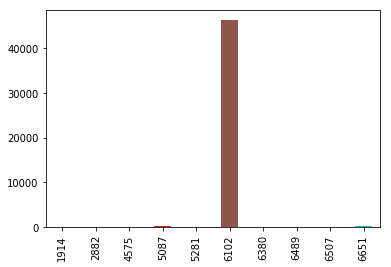

In [26]:
googleAidPlot.plot('bar')

In [27]:
# Converting the above dictionary into a DataFrame with index as the affiliate_id
plottingdf_GoogleAid = pd.DataFrame(list(googleAidUniqueCount.items()), columns=["ID","Google_Aid_Count"], index=googleAidUniqueCount.keys())

In [28]:
plottingdf_GoogleAid

,ID,Google_Aid_Count
1914,1914,19
2882,2882,23
4575,4575,1
5087,5087,208
5281,5281,18
6102,6102,46188
6380,6380,1
6489,6489,4
6507,6507,1
6651,6651,179


In [29]:
# Merging the two dataframes - plottingdf_GoogleAid and plottingdf_iosIfa on affiliate_id(ID) 
resultdf = pd.merge(plottingdf_GoogleAid, plottingdf_iosIfa, on = 'ID')

In [30]:
resultdf

,ID,Google_Aid_Count,Ios_Ifa_Count
0,1914,19,1
1,2882,23,190
2,4575,1,1
3,5087,208,7535
4,5281,18,8
5,6102,46188,1
6,6380,1,1
7,6489,4,3
8,6507,1,1
9,6651,179,1


### 1(b): Calculate how many valid google_aid & ios_ifa exist in the dataset.

#### A google_aid value always exists in this format: nnnnnnnn-nnnn-nnnn-nnnnnnnnnnnnnnnn where all characters are alphanumeric, and in lower case, overall length is 36 characters.

In [31]:
# UUID regular expression for google_aid 
google_aid_regex = r"[0-9a-f]{8}-[0-9a-f]{4}-[0-9a-f]{4}-[0-9a-f]{4}-[0-9a-f]{12}"

#### An ios_ifa identifier also exists in the same format: NNNNNNNNNNNN-NNNN-NNNN-NNNNNNNNNNNN where all the characters are alphanumeric, and in upper case, overall length is 36 characters.

In [32]:
# UUID regular expression for ios_ifa
ios_ifa_regex = r"[0-9A-F]{8}-[0-9A-F]{4}-[0-9A-F]{4}-[0-9A-F]{4}-[0-9A-F]{12}"

In [33]:
def validate_UUID(col,col_name):
    if col_name == "ios_ifa":
        q = re.findall(ios_ifa_regex, col)
    else:
        q = re.findall(google_aid_regex, col)
    if len(q) > 0:
        return q[0]
    else:
        return 0

In [34]:
# Validating ios_ifa with the ios_ifa_regex
df['ios_ifa_validated'] = df['ios_ifa'].apply(lambda x: validate_UUID(x, df['ios_ifa'].name))

In [35]:
# Count of the total valid ios_ifa values
df[df['ios_ifa_validated'] !=0 ]['ios_ifa'].count()

7350

In [36]:
# Validating google_aid with the google_aid_regex
df['google_aid_validated'] = df['google_aid'].apply(lambda x: validate_UUID(x, df['google_aid'].name))

In [37]:
# Count of the total valid google_aid values
df[df['google_aid_validated'] !=0 ]['google_aid'].count()

46554

### 2(a): Plot a histogram from the data obtained from exercise 1(a).

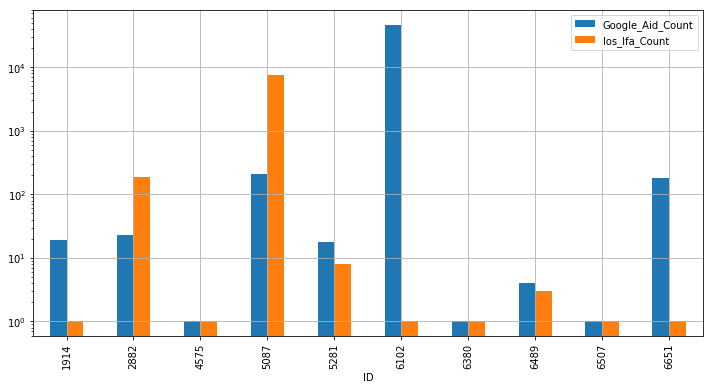

In [38]:
# Graph with Affiliate_Id on the X-Axis and Frequency on the Y-Axis
resultdf.set_index('ID').plot.bar(grid=True,logy=True, figsize = (12,6))

### 2(b): Plot a histogram of the no. of clicks v/s affiliate_id in the dataset.

In [39]:
# Computing the no. of clicks per affiliate_id
Total_Clicks_per_AffiliateID = df.groupby('affiliate_id').size()

In [40]:
Total_Clicks_per_AffiliateID

affiliate_id
1914    19   
2882    862  
4575    1    
5087    38640
5281    25   
6102    46242
6380    1    
6489    5    
6507    1    
6651    180  
dtype: int64

In [41]:
type(Total_Clicks_per_AffiliateID)

pandas.core.series.Series

In [42]:
# Converting the above series to the dataframe
clicks_df = pd.DataFrame(Total_Clicks_per_AffiliateID)

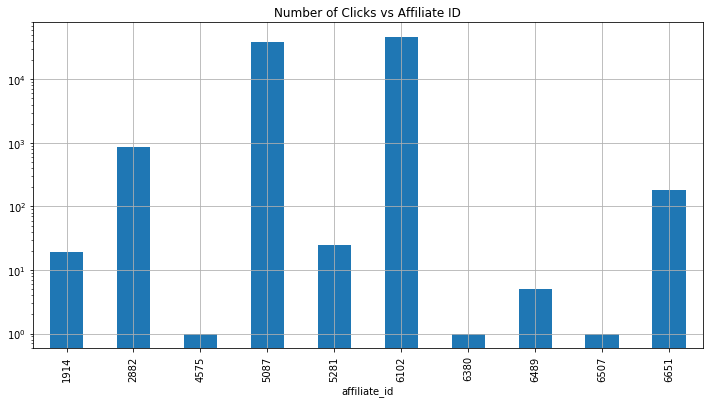

In [43]:
# Plotting the graph to represent Number of Clicks per Affiliate_Id
clicks_df.plot.bar(grid=True,logy=True, figsize = (12,6), legend = False, title = "Number of Clicks vs Affiliate ID")